In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('seattleWeather_1948-2017.csv')

In [4]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [5]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [6]:
df.isna().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [7]:
fill_columns_zero = ['PRCP']

In [8]:
df[fill_columns_zero] = df[fill_columns_zero].fillna(0)

In [9]:
df.isna().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [10]:
df = df.drop(['DATE'],axis = 'columns')

In [11]:
df.head()

,PRCP,TMAX,TMIN,RAIN
0,0.47,51,42,True
1,0.59,45,36,True
2,0.42,45,35,True
3,0.31,45,34,True
4,0.17,45,32,True


In [12]:
df = pd.get_dummies(df,drop_first = True)

In [13]:
df.head()

,PRCP,TMAX,TMIN,RAIN_True
0,0.47,51,42,1
1,0.59,45,36,1
2,0.42,45,35,1
3,0.31,45,34,1
4,0.17,45,32,1


In [14]:
x = df.drop(['RAIN_True'],axis = 'columns')

In [15]:
y = df['RAIN_True']

In [16]:
x

,PRCP,TMAX,TMIN
0,0.47,51,42
1,0.59,45,36
2,0.42,45,35
3,0.31,45,34
4,0.17,45,32
...,...,...,...
25546,0.00,49,34
25547,0.00,49,29
25548,0.00,46,32
25549,0.00,48,34


In [17]:
y

0        1
1        1
2        1
3        1
4        1
        ..
25546    0
25547    0
25548    0
25549    0
25550    0
Name: RAIN_True, Length: 25551, dtype: uint8

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [20]:
X_train

,PRCP,TMAX,TMIN
14215,0.00,44,32
9534,0.00,47,39
3467,0.00,65,52
9123,0.79,50,45
21297,0.00,71,43
...,...,...,...
211,0.00,80,57
1518,0.00,46,31
9925,0.00,46,31
12586,0.00,83,57


In [21]:
X_test

,PRCP,TMAX,TMIN
11285,0.00,47,36
10703,0.07,61,52
24752,0.00,66,56
17027,0.00,79,56
5633,0.49,56,50
...,...,...,...
10607,0.10,52,46
23406,0.07,49,43
21354,0.00,67,53
9660,0.00,85,56


In [23]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [24]:
reg.fit(X_train,y_train)

LinearRegression()

In [25]:
reg.score(X_test,y_test)

0.4118638364830023

In [26]:
from sklearn.svm import SVC
svm = SVC()

In [27]:
svm.fit(X_train,y_train)

SVC()

In [31]:
svm.score(X_test,y_test)

0.7775386421443945

In [33]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [34]:
gnb.fit(X_train,y_train)

GaussianNB()

In [35]:
gnb.score(X_test,y_test)

1.0

In [36]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [37]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [38]:
mnb.score(X_test,y_test)

0.8855409900215222

In [39]:
y_pred_gnb = gnb.predict(X_test)

In [40]:
y_pred_gnb

array([0, 1, 0, ..., 0, 0, 0], dtype=uint8)

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_gnb,y_test)

In [44]:
cm

array([[2894,    0],
       [   0, 2217]], dtype=int64)

In [46]:
import seaborn as sn

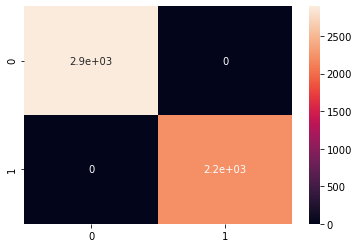

In [53]:
sn.heatmap(cm,annot = True)